In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Mestrado/Dataset


/content/drive/MyDrive/Mestrado/Dataset


Importação dos Dados

In [4]:
import pandas as pd
df_geracao = pd.read_excel('geracao_082024.xlsx')
df_metereologico = pd.read_excel('metereologico_082024.xlsx')

In [ ]:
df_geracao.rename(columns={df_geracao.columns[0]: 'horário'}, inplace=True)
df_geracao.head()

,horário,Frequencia,Tensão A,Tensão B,Tensão C,Tensão A-B,Tensão B-C,Tensão C-A,Corrente A,Corrente B,...,Reverso: P. Ativa Fund. B,Reverso: P. Ativa Fund. C,Reverso: P. Ativa Fund. Total,Reverso: P. Ativa Harm. A,Reverso: P. Ativa Harm. B,Reverso: P. Ativa Harm. C,Reverso: P. Ativa Harm. Total,Desequilibrio de Tensão (Fasorial) Total,Desequilibrio de Tensão (Amplitude) Total,Desequilibrio de Corrente (Amplitude) Total
0,01/08/2024 00:00:00,59.99,127.59,127.47,128.23,220.40,221.69,221.79,59.78,33.51,...,0.0,0.0,0.0,1.05,3.19,0.54,4.78,0.41,0.37,36.28
1,01/08/2024 00:15:00,60.01,127.47,127.40,128.12,220.20,221.58,221.58,59.48,31.87,...,0.0,0.0,0.0,1.60,3.27,0.49,5.37,0.42,0.36,38.47
2,01/08/2024 00:30:00,60.00,127.89,127.78,128.43,220.94,222.12,222.20,69.60,38.62,...,0.0,0.0,0.0,0.68,2.64,0.30,3.62,0.37,0.31,36.38
3,01/08/2024 00:45:00,60.00,127.53,127.44,128.06,220.37,221.52,221.52,71.56,44.92,...,0.0,0.0,0.0,0.70,2.10,0.23,3.03,0.35,0.30,31.17
4,01/08/2024 01:00:00,60.00,127.67,127.68,128.29,220.65,221.97,221.86,70.24,40.99,...,0.0,0.0,0.0,0.81,2.35,0.36,3.52,0.39,0.32,35.49


In [ ]:
df_geracao.shape

(2975, 61)

In [ ]:
df_metereologico.head()

,Data LOCAL,Hora LOCAL,Temp int,Pressao inst,Pressao med,Pressao max,Pressao min,Temperatura inst,Temperatura med,Temperatura max,...,Velocidade vento min,Temp solo inst,Temp solo med,Temp solo max,Temp solo min,Umid solo inst,Umid solo med,Umid solo max,Umid solo min,Precipitação
0,2024-08-01,00:00:07,21.4,1022.1,1022.0,1022.1,1022.0,21.9,21.9,21.9,...,0.6,23.8,23.8,23.8,23.8,432,426,432,410,0.0
1,2024-08-01,00:15:07,21.6,1022.1,1022.0,1022.1,1022.0,21.9,21.9,22.0,...,1.0,23.8,23.8,23.8,23.8,432,432,432,432,0.0
2,2024-08-01,00:30:07,21.7,1022.0,1022.0,1022.1,1022.0,21.9,21.9,22.0,...,0.6,23.8,23.8,23.8,23.8,433,433,433,432,0.0
3,2024-08-01,00:45:07,21.7,1021.8,1021.9,1022.0,1021.8,22.0,21.9,22.0,...,0.5,23.7,23.8,23.8,23.7,433,433,433,433,0.0
4,2024-08-01,01:00:07,21.8,1021.7,1021.8,1021.8,1021.7,22.0,22.0,22.0,...,0.9,23.7,23.7,23.7,23.7,433,433,433,433,0.0


In [ ]:
df_metereologico.shape

(2975, 58)

In [ ]:
df_metereologico['datetime'] = pd.to_datetime(
    df_metereologico['Data LOCAL'].astype(str) + ' ' + df_metereologico['Hora LOCAL'].astype(str),
    format='%Y-%m-%d %H:%M:%S', errors='coerce'
)

In [ ]:
df_geracao['datetime'] = pd.to_datetime(df_geracao['horário'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
print(df_geracao['datetime'].head())
print(df_metereologico['datetime'].head())

0   2024-08-01 00:00:00
1   2024-08-01 00:15:00
2   2024-08-01 00:30:00
3   2024-08-01 00:45:00
4   2024-08-01 01:00:00
Name: datetime, dtype: datetime64[ns]
0   2024-08-01 00:00:07
1   2024-08-01 00:15:07
2   2024-08-01 00:30:07
3   2024-08-01 00:45:07
4   2024-08-01 01:00:07
Name: datetime, dtype: datetime64[ns]


In [ ]:
df_metereologico['datetime'] = df_metereologico['datetime'].dt.floor('min')
df_geracao['datetime'] = df_geracao['datetime'].dt.floor('min')

In [ ]:
df_final = pd.merge(df_geracao, df_metereologico, on='datetime', how='inner')
print(df_final.shape)

(2975, 120)


In [ ]:
df_final.head()

,horário,Frequencia,Tensão A,Tensão B,Tensão C,Tensão A-B,Tensão B-C,Tensão C-A,Corrente A,Corrente B,...,Velocidade vento min,Temp solo inst,Temp solo med,Temp solo max,Temp solo min,Umid solo inst,Umid solo med,Umid solo max,Umid solo min,Precipitação
0,01/08/2024 00:00:00,59.99,127.59,127.47,128.23,220.40,221.69,221.79,59.78,33.51,...,0.6,23.8,23.8,23.8,23.8,432,426,432,410,0.0
1,01/08/2024 00:15:00,60.01,127.47,127.40,128.12,220.20,221.58,221.58,59.48,31.87,...,1.0,23.8,23.8,23.8,23.8,432,432,432,432,0.0
2,01/08/2024 00:30:00,60.00,127.89,127.78,128.43,220.94,222.12,222.20,69.60,38.62,...,0.6,23.8,23.8,23.8,23.8,433,433,433,432,0.0
3,01/08/2024 00:45:00,60.00,127.53,127.44,128.06,220.37,221.52,221.52,71.56,44.92,...,0.5,23.7,23.8,23.8,23.7,433,433,433,433,0.0
4,01/08/2024 01:00:00,60.00,127.67,127.68,128.29,220.65,221.97,221.86,70.24,40.99,...,0.9,23.7,23.7,23.7,23.7,433,433,433,433,0.0


In [ ]:
nomes_colunas = df_final.columns.tolist()
print(nomes_colunas)

['horário', 'Frequencia', 'Tensão A', 'Tensão B', 'Tensão C', 'Tensão A-B', 'Tensão B-C', 'Tensão C-A', 'Corrente A', 'Corrente B', 'Corrente C', 'Corrente Neutro Medido', 'Corrente Neutro Calculado', 'P. Aparente A', 'P. Aparente B', 'P. Aparente C', 'P. Aparente Soma Aritmética', 'P. Aparente Soma Vetorial', 'P. Reativa A', 'P. Reativa B', 'P. Reativa C', 'P. Reativa Total', 'FP Real A', 'FP Real B', 'FP Real C', 'FP Real Soma Vetorial', 'Cos(φ) A', 'Cos(φ) B', 'Cos(φ) C', 'Cos(φ) Média Ponderada', 'Ind Fase 1', 'Ind Fase 2', 'Ind Fase 3', 'Ind Média', 'Direto: P. Ativa Fund+Harm A', 'Direto: P. Ativa Fund+Harm B', 'Direto: P. Ativa Fund+Harm C', 'Direto: P. Ativa Fund+Harm Total', 'Direto: P. Ativa Fund. A', 'Direto: P. Ativa Fund. B', 'Direto: P. Ativa Fund. C', 'Direto: P. Ativa Fund. Total', 'Direto: P. Ativa Harm. A', 'Direto: P. Ativa Harm. B', 'Direto: P. Ativa Harm. C', 'Direto: P. Ativa Harm. Total', 'Reverso: P. Ativa Fund+Harm A', 'Reverso: P. Ativa Fund+Harm B', 'Reverso:

In [ ]:
df_final.columns

Index(['horário', 'Frequencia', 'Tensão A', 'Tensão B', 'Tensão C',
       'Tensão A-B', 'Tensão B-C', 'Tensão C-A', 'Corrente A', 'Corrente B',
       ...
       'Velocidade vento min', 'Temp solo inst', 'Temp solo med',
       'Temp solo max', 'Temp solo min', 'Umid solo inst', 'Umid solo med',
       'Umid solo max', 'Umid solo min', 'Precipitação'],
      dtype='object', length=120)

In [ ]:
colunas_desejadas = ['horário',
    'Frequencia', 'Tensão A', 'Tensão B', 'Tensão C', 'Tensão A-B',
    'Tensão B-C', 'Tensão C-A', 'Corrente A', 'Corrente B', 'Corrente C',
    'Corrente Neutro Medido', 'Cos(φ) Média Ponderada',
    'Direto: P. Ativa Fund+Harm Total', 'Reverso: P. Ativa Fund+Harm Total','Desequilibrio de Tensão (Fasorial) Total',
       'Desequilibrio de Tensão (Amplitude) Total',
       'Desequilibrio de Corrente (Amplitude) Total','Pressao inst', 'Temperatura inst',
    'Umidade Relativa inst', 'Radiação solar global inst LPPYRA02', 'Radiação solar global inst LPNET14', 'Radiação solar refletida inst',
    'Radiação IV inst', 'Radiação spf inst', 'Radiação solar líquida inst', 'Velocidade vento med', 'Temp solo inst', 'Umid solo inst',
    'Precipitação'
]

In [ ]:
dataset_final = df_final[colunas_desejadas]

In [ ]:
dataset_final.columns

Index(['horário', 'Frequencia', 'Tensão A', 'Tensão B', 'Tensão C',
       'Tensão A-B', 'Tensão B-C', 'Tensão C-A', 'Corrente A', 'Corrente B',
       'Corrente C', 'Corrente Neutro Medido', 'Cos(φ) Média Ponderada',
       'Direto: P. Ativa Fund+Harm Total', 'Reverso: P. Ativa Fund+Harm Total',
       'Desequilibrio de Tensão (Fasorial) Total',
       'Desequilibrio de Tensão (Amplitude) Total',
       'Desequilibrio de Corrente (Amplitude) Total', 'Pressao inst',
       'Temperatura inst', 'Umidade Relativa inst',
       'Radiação solar global inst LPPYRA02',
       'Radiação solar global inst LPNET14', 'Radiação solar refletida inst',
       'Radiação IV inst', 'Radiação spf inst', 'Radiação solar líquida inst',
       'Velocidade vento med', 'Temp solo inst', 'Umid solo inst',
       'Precipitação'],
      dtype='object')

In [ ]:
dataset_final.describe()

,Frequencia,Tensão A,Tensão B,Tensão C,Tensão A-B,Tensão B-C,Tensão C-A,Corrente A,Corrente B,Corrente C,...,Radiação solar global inst LPPYRA02,Radiação solar global inst LPNET14,Radiação solar refletida inst,Radiação IV inst,Radiação spf inst,Radiação solar líquida inst,Velocidade vento med,Temp solo inst,Umid solo inst,Precipitação
count,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,...,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000
mean,59.999953,127.922148,128.089476,128.718400,221.201869,222.712605,222.456545,81.442424,67.412911,84.038908,...,192.615126,196.999328,34.316975,-23.545546,-0.368739,139.507227,3.118319,24.642319,470.729748,0.014454
std,0.019860,0.563541,0.641943,0.554982,1.056978,1.048774,0.930842,47.426773,44.896938,47.155923,...,279.093131,279.875241,45.018012,21.120301,4.205246,223.103059,1.697580,0.960928,25.462109,0.182616
min,59.920000,126.110000,126.120000,126.990000,217.810000,219.490000,219.520000,7.960000,13.100000,10.170000,...,0.000000,0.000000,0.000000,-108.000000,-13.000000,-65.000000,0.100000,22.400000,420.000000,0.000000
25%,59.990000,127.540000,127.620000,128.320000,220.450000,221.970000,221.820000,54.500000,33.295000,58.320000,...,0.000000,0.000000,3.000000,-32.000000,-3.000000,-14.000000,1.750000,23.900000,445.000000,0.000000
50%,60.000000,127.920000,128.120000,128.730000,221.250000,222.750000,222.440000,62.010000,42.360000,66.240000,...,0.000000,1.000000,5.000000,-18.000000,-1.000000,-3.000000,2.900000,24.500000,472.000000,0.000000
75%,60.010000,128.310000,128.540000,129.100000,221.950000,223.440000,223.090000,110.320000,98.410000,109.935000,...,344.500000,369.000000,63.000000,-8.000000,1.000000,275.500000,4.200000,25.400000,492.000000,0.000000
max,60.090000,129.630000,129.890000,130.400000,224.170000,225.720000,225.270000,249.260000,221.600000,260.490000,...,1000.000000,1017.000000,165.000000,5.000000,14.000000,830.000000,8.700000,27.100000,524.000000,6.000000


In [ ]:
dataset_final = dataset_final.rename(columns={'Reverso: P. Ativa Fund+Harm Total': 'Pot. Injetada'})

In [ ]:
dataset_final.shape

(2975, 31)

In [ ]:
dataset_final.columns

Index(['horário', 'Frequencia', 'Tensão A', 'Tensão B', 'Tensão C',
       'Tensão A-B', 'Tensão B-C', 'Tensão C-A', 'Corrente A', 'Corrente B',
       'Corrente C', 'Corrente Neutro Medido', 'Cos(φ) Média Ponderada',
       'Direto: P. Ativa Fund+Harm Total', 'Solar power generation',
       'Desequilibrio de Tensão (Fasorial) Total',
       'Desequilibrio de Tensão (Amplitude) Total',
       'Desequilibrio de Corrente (Amplitude) Total', 'Pressao inst',
       'Inst. temperature', 'Instantaneous Relative humidity',
       'Inst. global solar radiation LPPYRA02',
       'Inst. global solar radiation LPNET14',
       'Inst. reflected solar radiation', 'Radiação IV inst',
       'Radiação spf inst', 'Inst. net reflected solar radiation',
       'Velocidade vento med', 'Temp solo inst', 'Umid solo inst',
       'Precipitação'],
      dtype='object')

In [ ]:
dataset_final = dataset_final.rename(columns={'Umidade Relativa inst': 'Instantaneous Relative humidity'})
dataset_final = dataset_final.rename(columns={'Temperatura inst': 'Inst. temperature'})
dataset_final = dataset_final.rename(columns={'Radiação solar global inst LPNET14': 'Inst. global solar radiation LPNET14'})
dataset_final = dataset_final.rename(columns={'Radiação solar global inst LPPYRA02': 'Inst. global solar radiation LPPYRA02'})
dataset_final = dataset_final.rename(columns={'Radiação solar refletida inst': 'Inst. reflected solar radiation'})

dataset_final = dataset_final.rename(columns={'Pot. Injetada': 'Solar power generation'})

In [ ]:
dataset_final = dataset_final.rename(columns={'net reflected solar radiation': 'Inst. net reflected solar radiation'})

array([[<Axes: title={'center': 'Frequencia'}>,
        <Axes: title={'center': 'Tensão A'}>,
        <Axes: title={'center': 'Tensão B'}>,
        <Axes: title={'center': 'Tensão C'}>,
        <Axes: title={'center': 'Tensão A-B'}>],
       [<Axes: title={'center': 'Tensão B-C'}>,
        <Axes: title={'center': 'Tensão C-A'}>,
        <Axes: title={'center': 'Corrente A'}>,
        <Axes: title={'center': 'Corrente B'}>,
        <Axes: title={'center': 'Corrente C'}>],
       [<Axes: title={'center': 'Corrente Neutro Medido'}>,
        <Axes: title={'center': 'Cos(φ) Média Ponderada'}>,
        <Axes: title={'center': 'Direto: P. Ativa Fund+Harm Total'}>,
        <Axes: title={'center': 'Pot. Injetada'}>,
        <Axes: title={'center': 'Desequilibrio de Tensão (Fasorial) Total'}>],
       [<Axes: title={'center': 'Desequilibrio de Tensão (Amplitude) Total'}>,
        <Axes: title={'center': 'Desequilibrio de Corrente (Amplitude) Total'}>,
        <Axes: title={'center': 'Pressao ins

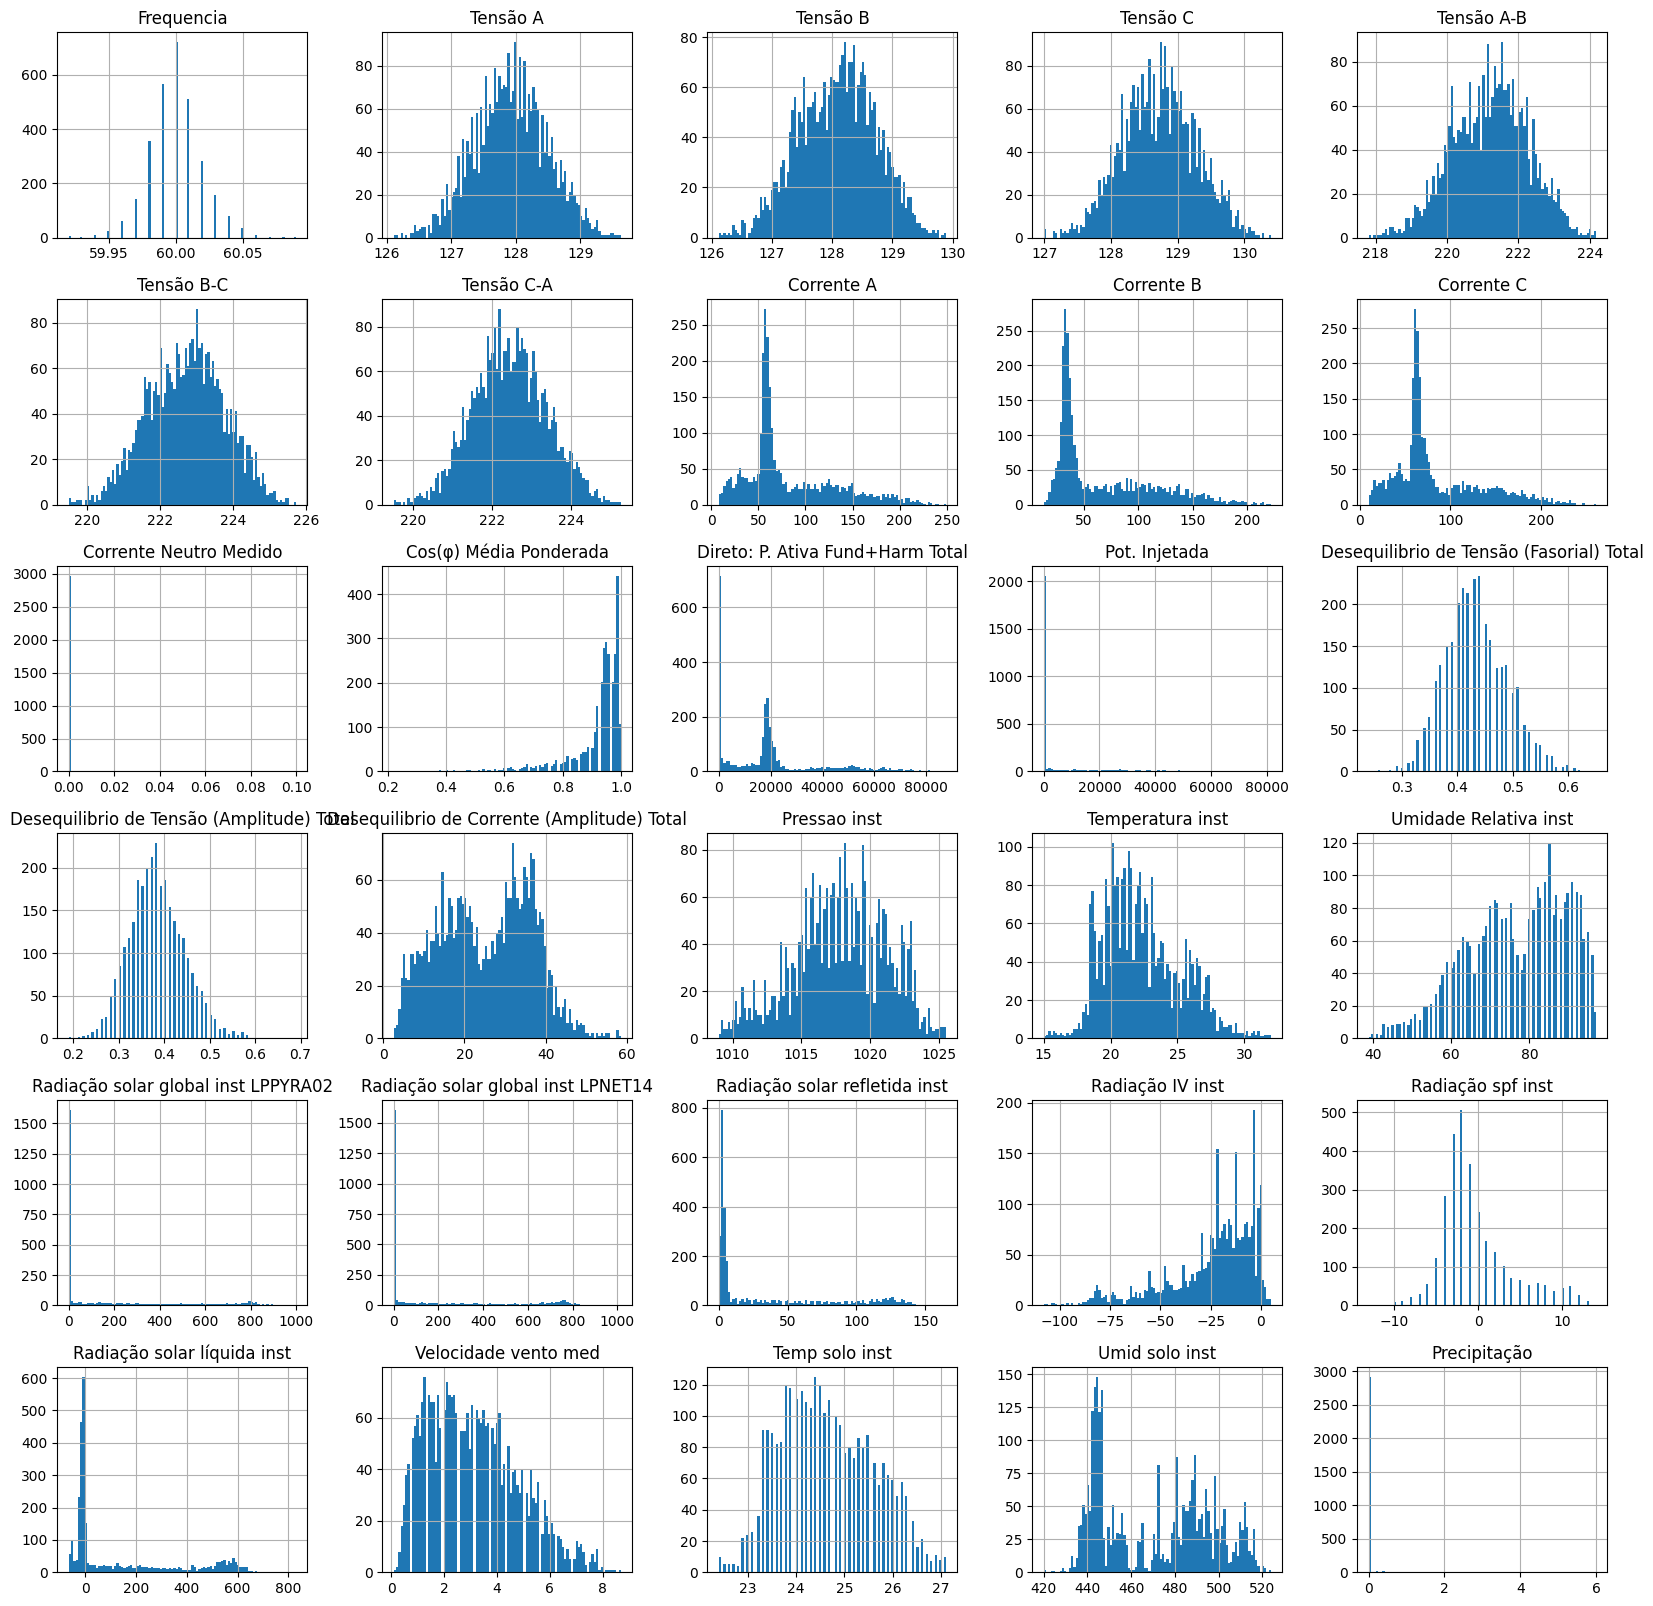

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


dataset_final.hist(figsize=(20, 20), bins=100)

Top variáveis correlacionadas com a target:
Inst. global solar radiation LPPYRA02          0.840696
Inst. net reflected solar radiation            0.832070
Inst. reflected solar radiation                0.831821
Inst. global solar radiation LPNET14           0.830277
Inst. temperature                              0.631104
Instantaneous Relative humidity               -0.595967
Corrente B                                     0.585563
Radiação spf inst                              0.573404
Desequilibrio de Corrente (Amplitude) Total   -0.569954
Direto: P. Ativa Fund+Harm Total              -0.514846
Corrente A                                     0.380503
Velocidade vento med                           0.356322
Tensão B                                       0.344427
Tensão B-C                                     0.328876
Radiação IV inst                              -0.324546
Name: Solar power generation, dtype: float64


<ipython-input-31-22aad6c044c7>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacao_target[top_features].values, y=top_features, palette='viridis')


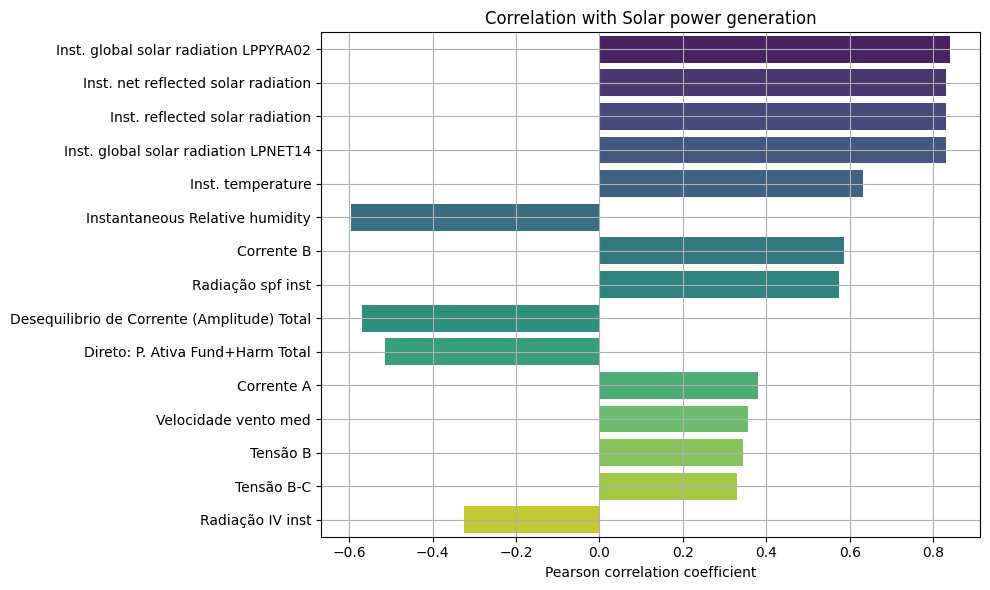

NameError: name 'df' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define o nome da sua variável target
target_col = 'Solar power generation'

# Calcula correlações (apenas numéricas)
correlacoes = dataset_final.corr(numeric_only=True)

# Seleciona as correlações com a target (excluindo ela mesma)
correlacao_target = correlacoes[target_col].drop(target_col)

# Ordena da maior para a menor correlação absoluta
correlacao_target_ordenada = correlacao_target.abs().sort_values(ascending=False)

# Exibe as top 15 features mais correlacionadas (positivas ou negativas)
top_features = correlacao_target_ordenada.head(15).index.tolist()
print("Top variáveis correlacionadas com a target:")
print(correlacao_target[top_features])

# Gráfico de barras das top correlações
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacao_target[top_features].values, y=top_features, palette='viridis')
plt.title(f'Correlation with {target_col}')
plt.xlabel('Pearson correlation coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis selecionadas')
plt.show()

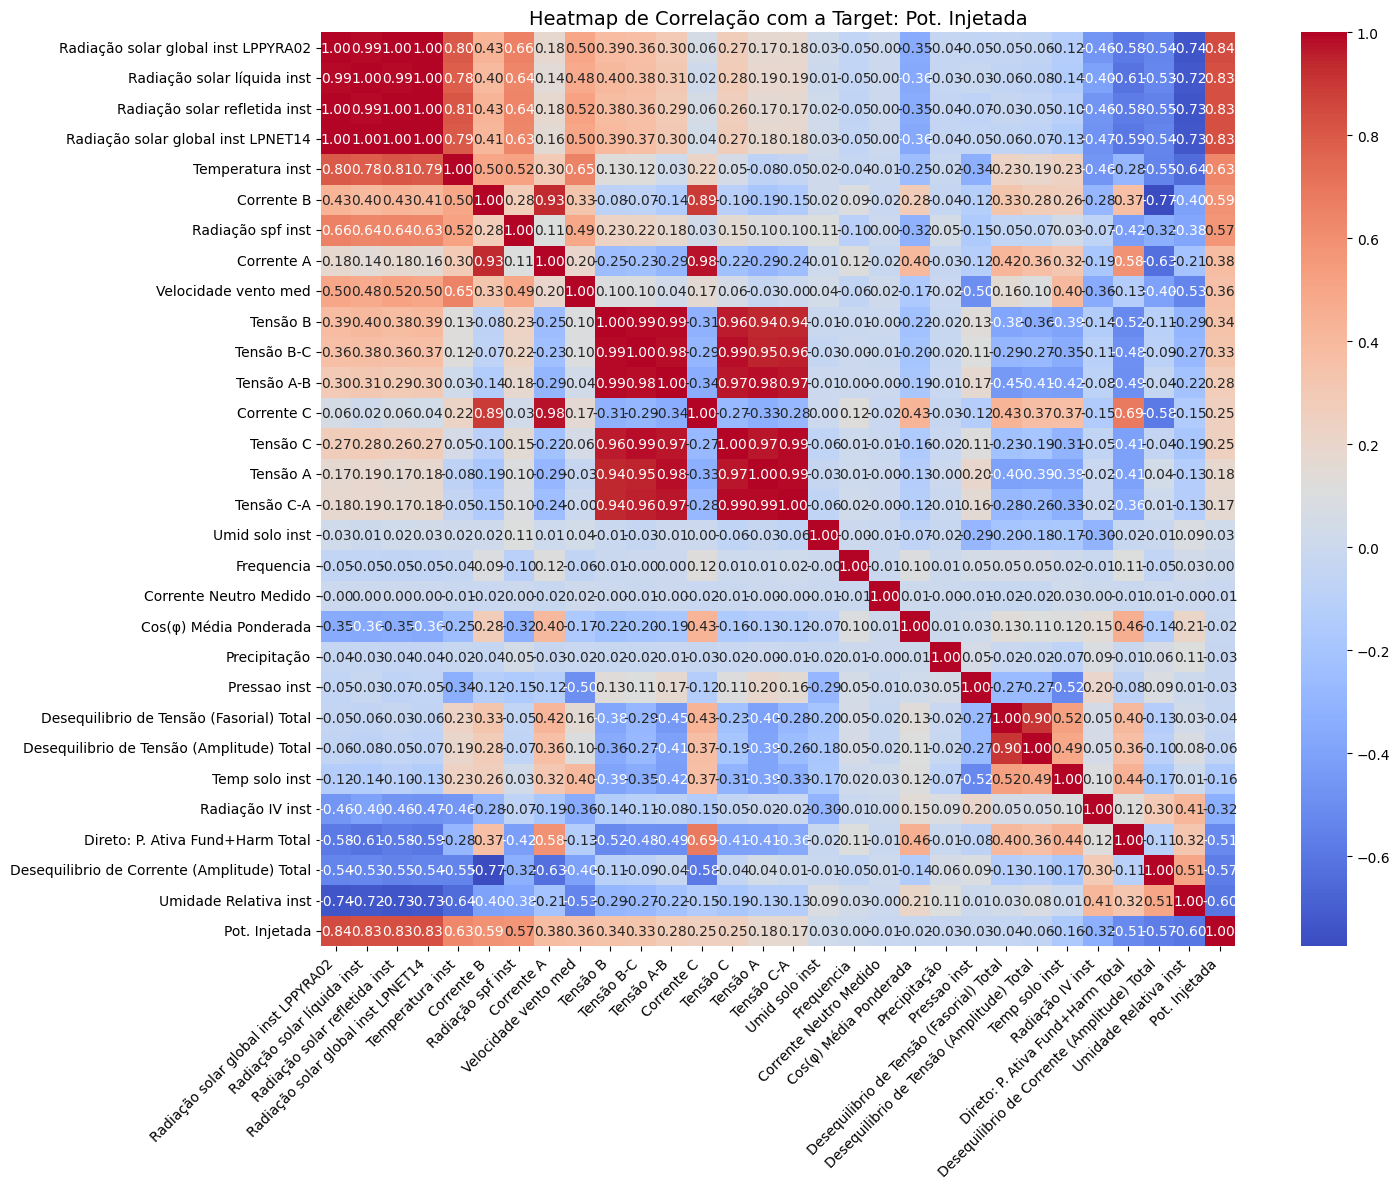

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Defina o nome exato da target
target = 'Solar power generation'

# 2. Calcula a correlação com a target
correlation_with_target = dataset_final.corr(numeric_only=True)[target].sort_values(ascending=False)

# 3. Seleciona as 15 variáveis mais correlacionadas (exceto a própria target)
top_features = correlation_with_target.drop(target).head(30).index.tolist()

# 4. Inclui a target de volta na lista
features_to_plot = top_features + [target]

# 5. Gera a matriz de correlação só com essas features
corr_matrix = dataset_final[features_to_plot].corr()

# 6. Plot do heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title(f'Heatmap de Correlação com a Target: {target}', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

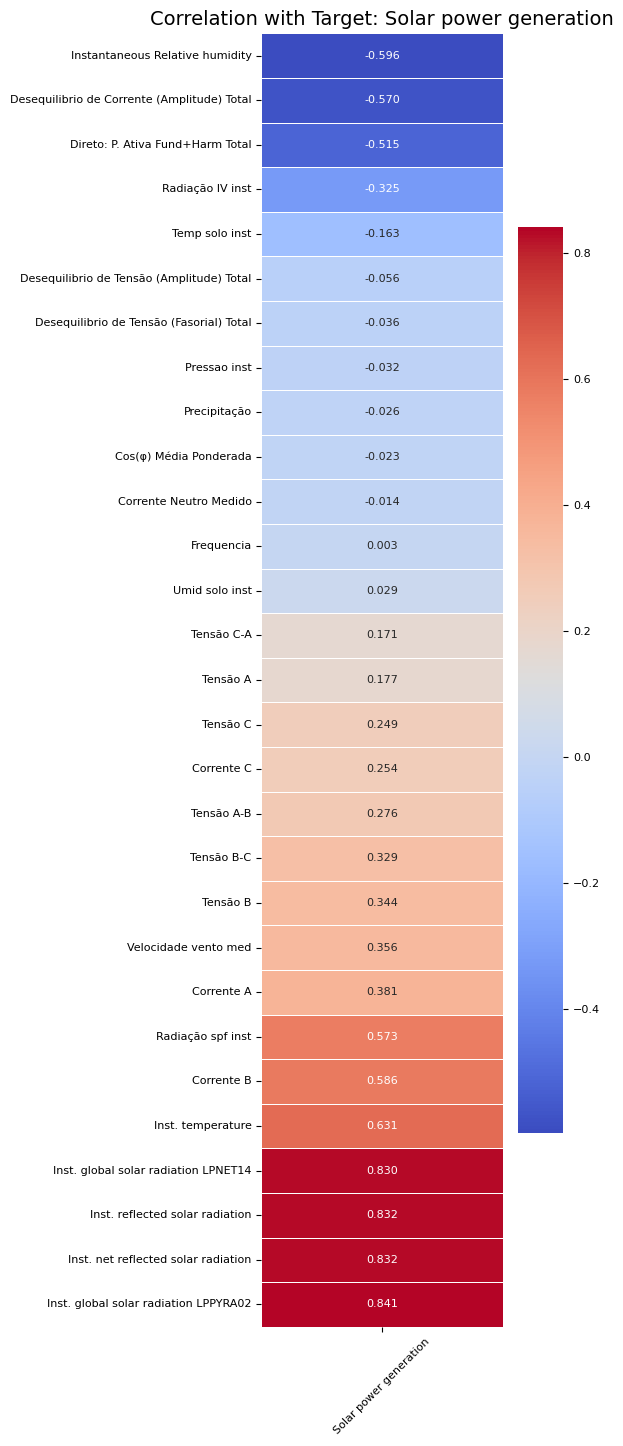

In [ ]:

# Define a variável alvo
target = 'Solar power generation'

# Calcula a correlação com a target
correlation_with_target = dataset_final.corr(numeric_only=True)[target].drop(target)

# Filtra valor de correlação
correlation_filtered = correlation_with_target[correlation_with_target.abs() >= 0].sort_values(ascending=True)
plt.rcParams.update({'font.size': 8})
# Cria o heatmap 1D
plt.figure(figsize=(6, len(correlation_filtered) * 0.5))  # Altura dinâmica conforme número de variáveis
sns.heatmap(correlation_filtered.to_frame(),
            annot=True,
            cmap='coolwarm',
            cbar=True,
            fmt=".3f",
            linewidths=0.5)

plt.title(f'Correlation with Target: {target}', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#1 Atividade - fazer a correlação de temperatura só do horário de geração - período da geração
#2 Atividade - E depois fazer um esquema com período de 6-22 do consumo do campus com as variáveis metereológicas


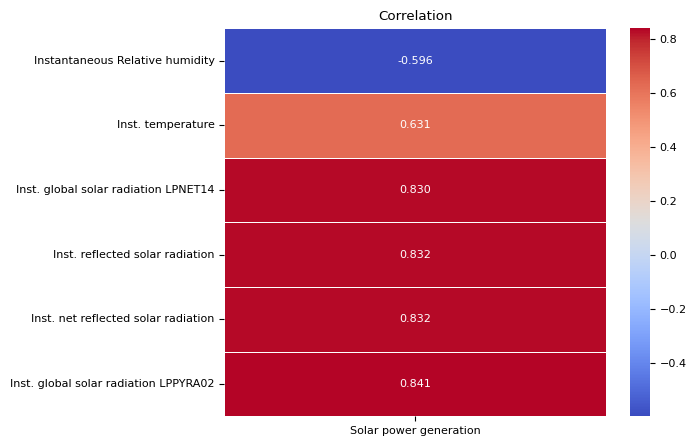

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
# Define a variável alvo
target = 'Solar power generation'

# Calcula a correlação com a target
correlation_with_target = dataset_final.corr(numeric_only=True)[target].drop(target)

# Filtra apenas correlações com módulo maior que 0.59
correlation_filtered = correlation_with_target[correlation_with_target.abs() >= 0.59].sort_values(ascending=True)

plt.rcParams.update({'font.size': 8})

# Criar figura no padrão IEEE (largura de 2 colunas)
plt.figure(figsize=(7.16, 4.5))

# Plotagem do heatmap
sns.heatmap(correlation_filtered.to_frame(),
            annot=True,
            cmap='coolwarm',
            cbar=True,
            fmt=".3f",
            linewidths=0.5)

plt.title('Correlation')
plt.xticks(rotation=0)

# Layout e salvamento
plt.tight_layout()
plt.savefig('heatmap_ieee_en.png', dpi=300, bbox_inches='tight')  # salvar imagem com alta resolução

plt.show()

# Download da imagem
files.download('heatmap_ieee_en.png')



In [ ]:
dataset_final.columns

Index(['horário', 'Frequencia', 'Tensão A', 'Tensão B', 'Tensão C',
       'Tensão A-B', 'Tensão B-C', 'Tensão C-A', 'Corrente A', 'Corrente B',
       'Corrente C', 'Corrente Neutro Medido', 'Cos(φ) Média Ponderada',
       'Direto: P. Ativa Fund+Harm Total', 'Solar power generation',
       'Desequilibrio de Tensão (Fasorial) Total',
       'Desequilibrio de Tensão (Amplitude) Total',
       'Desequilibrio de Corrente (Amplitude) Total', 'Pressao inst',
       'Inst. temperature', 'Instantaneous Relative humidity',
       'Inst. global solar radiation LPPYRA02',
       'Inst. global solar radiation LPNET14',
       'Inst. reflected solar radiation', 'Radiação IV inst',
       'Radiação spf inst', 'Inst. net reflected solar radiation',
       'Velocidade vento med', 'Temp solo inst', 'Umid solo inst',
       'Precipitação'],
      dtype='object')

In [ ]:
features = ['horário',
    'Inst. global solar radiation LPPYRA02',
    'Inst. net reflected solar radiation',
    'Inst. reflected solar radiation',
    'Inst. global solar radiation LPNET14',
    'Inst. temperature',
    'Instantaneous Relative humidity'
]
target = 'Solar power generation'

df_model = dataset_final[features + [target]]

In [ ]:
df_model.head()

,horário,Radiação solar global inst LPPYRA02,Radiação solar líquida inst,Radiação solar refletida inst,Radiação solar global inst LPNET14,Temperatura inst,Umidade Relativa inst,Pot. Injetada
0,01/08/2024 00:00:00,0,-3,4,2,21.9,85,0.0
1,01/08/2024 00:15:00,0,-3,5,3,21.9,84,0.0
2,01/08/2024 00:30:00,0,-4,5,2,21.9,85,0.0
3,01/08/2024 00:45:00,0,-3,6,4,22.0,83,0.0
4,01/08/2024 01:00:00,0,-4,5,3,22.0,84,0.0


In [ ]:
df_model = df_model.reset_index()

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2975 entries, 0 to 2974
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   horário                                2975 non-null   object 
 1   Inst. global solar radiation LPPYRA02  2975 non-null   int64  
 2   Inst. net reflected solar radiation    2975 non-null   int64  
 3   Inst. reflected solar radiation        2975 non-null   int64  
 4   Inst. global solar radiation LPNET14   2975 non-null   int64  
 5   Inst. temperature                      2975 non-null   float64
 6   Instantaneous Relative humidity        2975 non-null   int64  
 7   Solar power generation                 2975 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 186.1+ KB


In [ ]:
df_model.describe()

,Inst. global solar radiation LPPYRA02,Inst. net reflected solar radiation,Inst. reflected solar radiation,Inst. global solar radiation LPNET14,Inst. temperature,Instantaneous Relative humidity,Solar power generation
count,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000,2975.000000
mean,192.615126,139.507227,34.316975,196.999328,22.367630,76.685042,8356.496756
std,279.093131,223.103059,45.018012,279.875241,2.865288,12.647301,16314.215826
min,0.000000,-65.000000,0.000000,0.000000,15.000000,39.000000,0.000000
25%,0.000000,-14.000000,3.000000,0.000000,20.200000,68.000000,0.000000
50%,0.000000,-3.000000,5.000000,1.000000,22.000000,78.000000,0.000000
75%,344.500000,275.500000,63.000000,369.000000,24.200000,87.000000,7722.530000
max,1000.000000,830.000000,165.000000,1017.000000,32.000000,97.000000,81559.400000


In [ ]:
# --- PRÉ-PROCESSAMENTO ---
df_model['horário'] = pd.to_datetime(df_model['horário'], dayfirst=True)
df_model.set_index('horário', inplace=True)  # Mantido como índice para ordenação temporal

<ipython-input-38-e17723667c47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['horário'] = pd.to_datetime(df_model['horário'], dayfirst=True)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb



# Define as features relevantes (removido 'horário')
#features = [
    #'Radiação solar global inst LPPYRA02',
    #'Radiação solar líquida inst',
    #'Radiação solar refletida inst',
    #'Radiação solar global inst LPNET14',
    #'Temperatura inst',
    #'Umidade Relativa inst'
#]
#target = 'Pot. Injetada'

features = ['Inst. global solar radiation LPPYRA02',
    'Inst. net reflected solar radiation',
    'Inst. reflected solar radiation',
    'Inst. global solar radiation LPNET14',
    'Inst. temperature',
    'Instantaneous Relative humidity'
]
target = 'Solar power generation'

# Normalização
df = df_model[features + [target]].dropna()
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# --- CRIAR JANELAS TEMPORAIS ---
janela = 4  # 96 pontos = 1 dia com 15 min de intervalo
X_lstm, y_lstm = [], []
for i in range(len(df_scaled) - janela):
    X_lstm.append(df_scaled.iloc[i:i+janela][features].values)
    y_lstm.append(df_scaled.iloc[i+janela][target])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Divisão treino/teste
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

# --- MODELO LSTM COM EarlyStopping ---
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(32),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

# Callback para parar quando não houver melhora em val_loss
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Treinamento com EarlyStopping
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_lstm, y_test_lstm),
    callbacks=[early_stop],
    verbose=1)


# Previsão LSTM
y_pred_lstm = model_lstm.predict(X_test_lstm)

# --- MODELO XGBOOST ---
X_xgb, y_xgb = [], []
for i in range(len(df_scaled) - janela):
    janela_flat = df_scaled.iloc[i:i+janela][features].values.flatten()
    X_xgb.append(janela_flat)
    y_xgb.append(df_scaled.iloc[i+janela][target])
X_xgb, y_xgb = np.array(X_xgb), np.array(y_xgb)

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, shuffle=False)

model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
model_xgb.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = model_xgb.predict(X_test_xgb)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0253 - val_loss: 0.0134
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0175 - val_loss: 0.0134
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157 - val_loss: 0.0124
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0153 - val_loss: 0.0122
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0143 - val_loss: 0.0132
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0162 - val_loss: 0.0113
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0135 - val_loss: 0.0125
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0154 - val_loss: 0.0107
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0133 - val_loss: 0.0116
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0150 - val_loss: 0.0107
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0135 - val_loss: 0.0103
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0152 - va

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- FUNÇÃO PARA IMPRIMIR MÉTRICAS ---
def imprimir_metricas(nome, y_true, y_pred):
    print(f"\n{nome} (valores reais):")
    print(f"MAE :  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE:  {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²  :  {r2_score(y_true, y_pred):.4f}")

# --- CÁLCULO DAS MÉTRICAS ---
imprimir_metricas("LSTM", y_test_lstm, y_pred_lstm)
imprimir_metricas("XGBoost", y_test_xgb, y_pred_xgb)


LSTM (valores reais):
MAE :  0.07
RMSE:  0.11
R²  :  0.7373

XGBoost (valores reais):
MAE :  0.06
RMSE:  0.13
R²  :  0.6047


In [ ]:
# --- INVERSÃO DA NORMALIZAÇÃO (apenas para a coluna alvo) ---
scaler_target = MinMaxScaler()
scaler_target.fit(df[[target]])  # usa os dados originais da variável-alvo

# LSTM
y_test_lstm_inv = scaler_target.inverse_transform(y_test_lstm.reshape(-1, 1))
y_pred_lstm_inv = scaler_target.inverse_transform(y_pred_lstm)

# XGBoost
y_test_xgb_inv = scaler_target.inverse_transform(y_test_xgb.reshape(-1, 1))
y_pred_xgb_inv = scaler_target.inverse_transform(y_pred_xgb.reshape(-1, 1))


LSTM (valores reais):
MAE :  4467.33
RMSE:  7977.60
R²  :  0.7732

XGBoost (valores reais):
MAE :  4574.45
RMSE:  9170.50
R²  :  0.7004


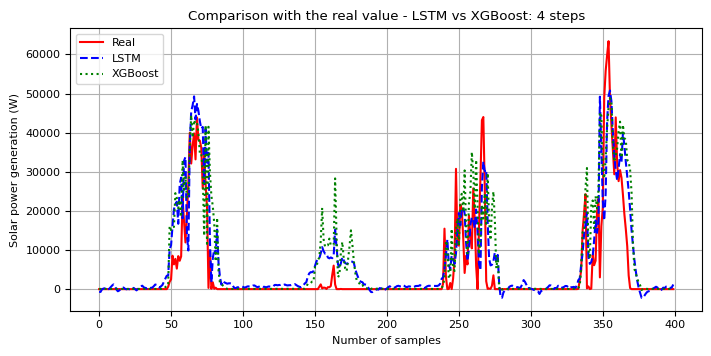

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- FUNÇÃO PARA IMPRIMIR MÉTRICAS ---
def imprimir_metricas(nome, y_true, y_pred):
    print(f"\n{nome} (valores reais):")
    print(f"MAE :  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE:  {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²  :  {r2_score(y_true, y_pred):.4f}")

# --- CÁLCULO DAS MÉTRICAS ---
imprimir_metricas("LSTM", y_test_lstm_inv, y_pred_lstm_inv)
imprimir_metricas("XGBoost", y_test_xgb_inv, y_pred_xgb_inv)

# --- PLOT COMPARATIVO ---
n_pontos = 400  # ajuste se quiser mais/menos pontos
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(7.16, 3.6))
plt.plot(y_test_lstm_inv[:n_pontos], label='Real', color='red')
plt.plot(y_pred_lstm_inv[:n_pontos], label='LSTM', color='blue', linestyle='--')
plt.plot(y_pred_xgb_inv[:n_pontos], label='XGBoost', color='green', linestyle=':')

plt.xlabel('Number of samples')
plt.ylabel('Solar power generation (W)')
plt.title('Comparison with the real value - LSTM vs XGBoost: 4 steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
# Salvar a figura ANTES do plt.show()
plt.savefig('janela-4pts_en.png', dpi=300, bbox_inches='tight')

# Mostrar a figura
plt.show()

# Fazer o download
files.download('janela-4pts_en.png')

In [ ]:
plt.savefig("grafico_previsao.png", dpi=300, bbox_inches='tight')  # PNG

<Figure size 640x480 with 0 Axes>

In [ ]:
df_model.columns, df_model.shape

(Index(['Radiação solar global inst LPPYRA02', 'Temperatura inst',
        'Umidade Relativa inst', 'Pot. Injetada'],
       dtype='object'),
 (2975, 4))

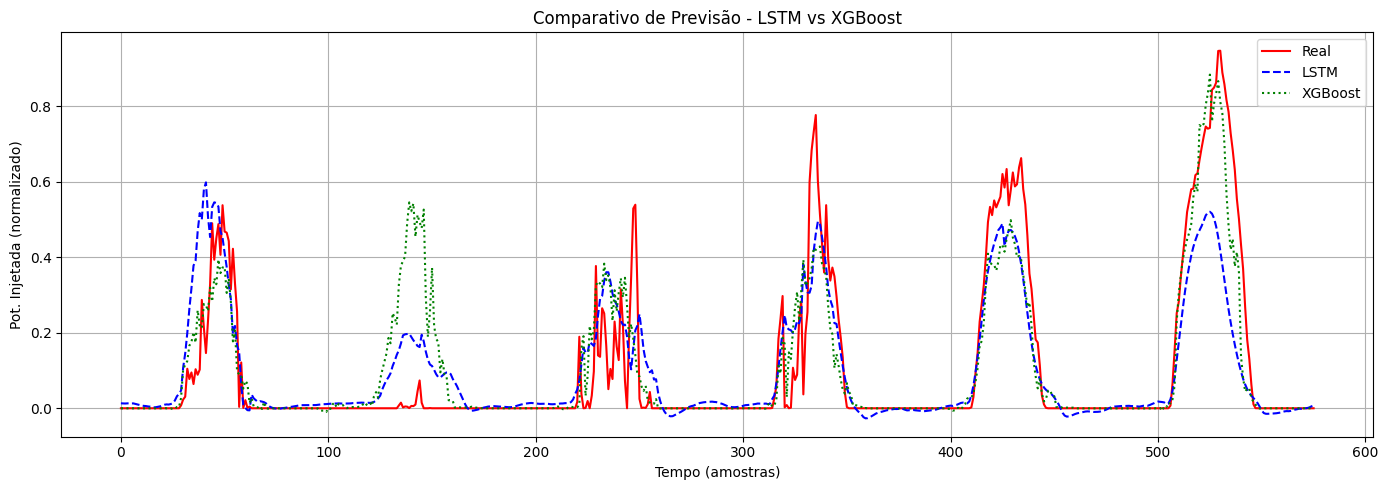

In [ ]:
n_pontos = 2974
plt.figure(figsize=(14, 5))
plt.plot(y_test_lstm[:n_pontos], label='Real', color='red')
plt.plot(y_pred_lstm[:n_pontos], label='LSTM', color='blue', linestyle='--')
plt.plot(y_pred_xgb[:n_pontos], label='XGBoost', color='green', linestyle=':')
plt.xlabel('Tempo (amostras)')
plt.ylabel('Pot. Injetada (normalizado)')
plt.title('Comparativo de Previsão - LSTM vs XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


//48 janelas (12 horas)

LSTM (valores reais):
MAE :  4827.11
RMSE:  8448.55
R²  :  0.7486

XGBoost (valores reais):
MAE :  5015.41
RMSE:  10033.24
R²  :  0.6455

//4 janelas ( 1 hora)

LSTM (valores reais):
MAE :  4453.01
RMSE:  7942.84
R²  :  0.7752

XGBoost (valores reais):
MAE :  4574.45
RMSE:  9170.50
R²  :  0.7004


//96 janelas (1 dia)
LSTM (valores reais):
MAE :  4789.09
RMSE:  8632.32
R²  :  0.7410

XGBoost (valores reais):
MAE :  5206.49
RMSE:  10664.77
R²  :  0.6047